# Week2: Grover's Algorithm
*(This tutorial partially refers to [Grover's algorithm and its Qiskit implementation](https://quantum-computing.ibm.com/support/guides/quantum-algorithms-with-qiskit?page=5cc0d9fd86b50d00642353ca#) under Quantum Algorithms with Qiskit in IBM Q Exprience. The last section "Qiskit implementation" was added for this specific challenge.)*

**Welcome to week 2 !** <br/><br/>
For this week, let us learn about a well-known quantum algorithm called Grover's algorithm. <br/> Also, **there is a learning challenge exercise for you to tackle on your own at the end of this tutorial.** <br/>

So let's get started.<br/><br/>
You may have heard that one of the advantages a quantum computer has over a classical computer is its superior speed searching databases.<br/>
Grover's algorithm demonstrates this capability. This algorithm can speed up an unstructured search problem quadratically, but its uses extend beyond that; it can serve as a general trick or subroutine to obtain quadratic run time improvements for a variety of other algorithms. This is called the amplitude amplification trick.

This page will walk you through the description of the search problem, building the oracle - the circuit representation of our search problem, and implementing the complete Grover algorithm in Qiskit.

# Unstructured search
Suppose you are given a large list of N items. Among these items there is one item with a unique property that we wish to locate; we will call this one the winner w. Think of each item in the list as a box of a particular item. Say all items in the list have grey colored items except the winning item w.

<img src="./fig/unstructured_search.png" width="700">

To find the winning item -- the marked item -- using classical computation, one would have to check on average $N/2$ of these boxes, and in the worst case, all $N$ of them. On a quantum computer, however, we can find the marked item in roughly $\sqrt{N}$ steps with Grover's amplitude amplification trick. A quadratic speedup is indeed a substantial time-saver for finding marked items in long lists. Additionally, the algorithm does not use the list's internal structure, which makes it generic; this is why it immediately provides a quadratic quantum speed-up for many classical problems.

# Creating an Oracle that marks the winning item
How will the list items be provided to the quantum computer? A common way to encode such a list is in terms of a function 𝑓 that returns $f(x)=0$ for all unmarked items $x$, and $f(w)=1$ for the winner. To use a quantum computer for this problem, we must provide the items in superposition to this function, so we encode the function into a unitary matrix called an **oracle**. First we choose a binary encoding of the items $x,w \in \{0,1\}^n$ so that $N=2^n$. This way, we can represent it in terms of qubits on a quantum computer. We then define the oracle matrix $U_w$ to act on any of the simple, standard basis states $|x>$ by $U_w |x> = (-1)^{f(x)}|x>$

We see that if $x$ is an unmarked item, the oracle does nothing to the state. However, when we apply the oracle to the basis state $|w>$, it maps $U_w |w> = -|w>$. Geometrically, this unitary matrix corresponds to a reflection about the origin for the marked item in an $N=2^n$-dimensional vector space.

<img src="./fig/oracle.png" width="700">

# Amplitude amplification
So how does the algorithm work? Before looking at the list of items, we have no idea where the marked item is. Therefore, any guess of its location is as good as any other. You may have heard the term superposition This can be expressed in terms of a uniform superposition: <br/>
$$|s> = \frac{1}{\sqrt N}\sum_{x=0}^{N-1} |x> $$

If at this point we were to measure in the standard basis $|x>$, this superposition would collapse to any one of the basis states with the same probability of $\frac{1}{N} = \frac{1}{2^{n}} $. Our chances of guessing the right value $|w>$ is therefore $\frac{1}{2^{n}}$, as could be expected. Hence, on average we would need to try about $N=2^{n}$ times to guess the correct item.

Now, let's enter the procedure called amplitude amplification, which is how a quantum computer significantly enhances this probability. This procedure stretches out (amplifies) the amplitude of the marked item, which shrinks the other items' amplitude, so that measuring the final state will return the right item with near-certainty.

This algorithm has a nice geometrical interpretation in terms of two reflections, which generate a rotation in a two-dimensional plane. The only two special states we need to consider are the winner $|w>$ and the uniform superposition $|s>$ . These two vectors span a two-dimensional plane in the vector space $\mathbb C^{N}$ . They are not quite perpendicular because $|w>$ occurs in the superposition with amplitude $N^{-1/2}$ as well.

We can, however, introduce an additional state $|s>$ that is in the span of these two vectors, which is perpendicular to $|w>$ and is obtained from $|s'>$ by removing $|w>$ and rescaling.


**Step 0** :
The amplitude amplification procedure starts out in the uniform superposition $|s>$ .  (The uniform superposition is easily constructed from $|s> = H^{\otimes n}|0>^{n}$ At $t=0$ the initial state is $|\psi_{0}> = |s>$.

<img src="./fig/step0.png" width="700">

**Step1** :
We apply the oracle reflection $U_{w}$ to the state $U_{w}|\psi_{t}> = |\psi_{t'}>$.
<img src="./fig/step1.png" width="700">
Geometrically, this corresponds to a reflection of the state $|\psi_{t}>$ about  $|s'>$ . This transformation means that the amplitude in front of the $|w>$ state becomes negative, which in turn means that the average amplitude has been lowered. (Note how the dotted line in the right graph is tapering).
    


**Step2**:
We now apply an additional reflection $U_{s}$ about the state $|s>$: $U_{s} = 2|s> <s| - 1 $ . This transformation maps the state to $U_{s}|\psi_{t'}>$ and completes the transformation $|\psi_{t+1}> = U_{s}U_{w}|\psi_{t}>$ .（Note how the amplitude at $|w>$ is amplified in the right graph).
<img src="./fig/step2.png" width="700">

Two reflections always correspond to a rotation. The transformation $ U_{s}U_{w}$ rotates the initial state $|s>$ closer towards the winner $|w>$ . (Please pay attention to left graph in Step 2. The action of the reflection $U_{s}$ in the amplitude bar diagram can be understood as a reflection about the average amplitude. Since the average amplitude has been lowered by the first reflection, this transformation boosts the negative amplitude of $|w>$ to roughly three times its original value, while it decreases the other amplitudes. We then go to **Step １** to repeat the application. This procedure will be repeated several times to zero in on the winner. 

After $t$ steps the state will have transformed to $|\psi_{t}> = (U_{s}U_{w})^{t}|\psi_{0}>$.

How many times do we need to apply the rotation? It turns out that roughly $\sqrt N$ rotations suffice. This becomes clear when looking at the amplitudes of the state $|\psi_{t}>$ . We can see that the amplitude of $|w>$ grows linearly with the number of applications（$ \sim tN^{1/2}$）. However, since we are dealing with amplitudes and not probabilities, the vector space's dimension enters as a square root. Therefore it is the amplitude, and not just the probability, that is being amplified in this procedure.

In the case that there are multiple solutions, $M$ it can be shown that roughly $\sqrt{(N/M)}$ rotations will suffice.
<img src="./fig/grover_algorithm.png" width="700">

### Qiskit implementation: Grover's algorithm using 2 qubits
Now, let's impement Grover's algorithm using Qiskit. In this example, we will use two qubits to find the state |11⟩.

First we prepare our environment.

In [7]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

As we have seen in Step1, let us create a phase oracle to mark the state |11⟩.

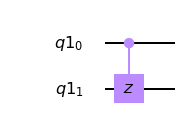

In [8]:
def phase_oracle(circuit, register):
    circuit.cz(register[0], register[1])

qr = QuantumRegister(2)
oracleCircuit = QuantumCircuit(qr)
phase_oracle(oracleCircuit, qr)
oracleCircuit.draw(output="mpl")

Next we set up the circuit for inversion about the average as we saw in step 2. This circuit is sometimes called an amplitude ampification module or a diffusion circuit.

In [9]:
def inversion_about_average(circuit, register):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0], register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)

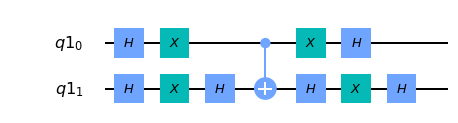

In [10]:
qAverage = QuantumCircuit(qr)
inversion_about_average(qAverage, qr)
qAverage.draw(output='mpl')

Now we put the pieces together, with the creation of a uniform superposition at the start of the circuit and a measurement at the end. Note that since there is one solution and four possibilities, we will only need to run one iteration.

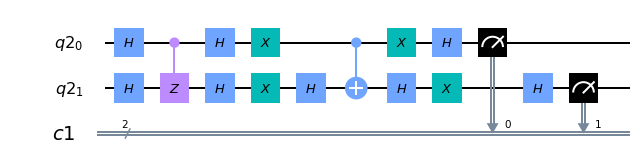

In [11]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

phase_oracle(groverCircuit, qr)
inversion_about_average(groverCircuit, qr)

groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

### Experiment with Simulators
We now run the above circuit on the simulator.

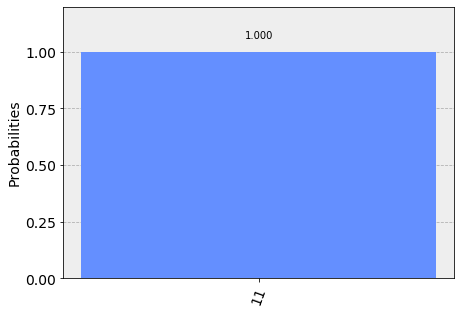

In [12]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

As we can see, the algorithm discovers our marked states.

### Experiment with Real Devices
We can run the circuit on the real device as shown below.

In [13]:
# Load our saved IBMQ accounts and get the least busy backend device

# These are compatible with QisKit v0.11.x
# IBMQ.load_accounts()
# IBMQ.backends()
# backend_lb = least_busy(IBMQ.backends(simulator=False))
# print("Least busy backend: ", backend_lb)

# Updated to run on QisKit v0.12.0
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend_lb = least_busy(provider.backends(simulator=False, operational=True))
print("Least busy backend: ", backend_lb)

/Applications/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


Least busy backend:  ibmq_16_melbourne


In [14]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

backend = backend_lb
shots = 1024
job_exp = execute(groverCircuit, backend=backend, shots=shots)

job_monitor(job_exp, interval = 2)

Job Status: job has successfully run


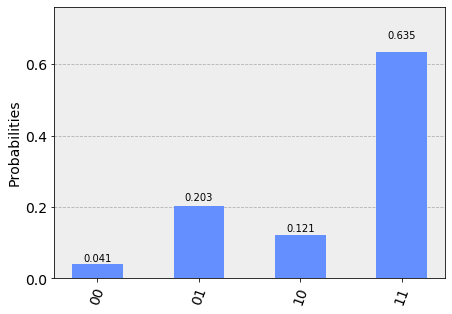

In [15]:
# get the results from the computation
results = job_exp.result()
answer = results.get_counts(groverCircuit)
plot_histogram(answer)

### Qiskit implementation: 2 qubit Grover's algorithm using ancilla bits
We are going to find the state $|11>$ just like in the previous example but this time using an ancilla bit. Ancilla bits bits will allow you to deal with sutations when more qubits are required or implement more complex oracles.

Let us prepare the environment first.

In [2]:
# Initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Import basic plot tools
from qiskit.tools.visualization import plot_histogram

We will create an oracle that will flip the phase of the answer (in this case $|11>$ ) we are looking for. This time, using the ancilla bit to make the target bit's phase flip when the input state is $|11>$ . Please note that in order to make this phase flip work, you need to prepare the ancilla bit to be $|1>$ by using an x gate.

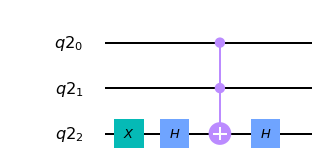

In [11]:
def phase_oracle(circuit, register,oracle_register):
    circuit.h(oracle_register)
    circuit.ccx(register[0], register[1],oracle_register)
    circuit.h(oracle_register)
    
qr = QuantumRegister(3)
oracleCircuit = QuantumCircuit(qr)
oracleCircuit.x(qr[2])
phase_oracle(oracleCircuit, qr,qr[2])
oracleCircuit.draw(output="mpl")

Next we prepare the amplitude amplification module/diffusion circuit. Make sure that the circuit does not act on the ancilla bit.

In [12]:
def inversion_about_average(circuit, register):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0], register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)

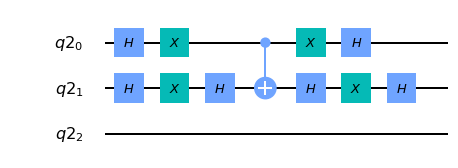

In [13]:
qAverage = QuantumCircuit(qr)
inversion_about_average(qAverage, qr[0:2])
qAverage.draw(output='mpl')

Just like we did in the previous example without using the ancilla bit, here we first create a uniform superposition by using the hadamard (H gate) , incorporate the transformation and then take measurement. Again, please make sure that you do not apply the H gate to your ancilla bit.

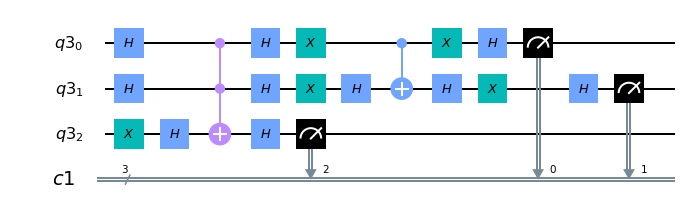

In [14]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr[0:2])
groverCircuit.x(qr[2])

phase_oracle(groverCircuit, qr,qr[2])
inversion_about_average(groverCircuit, qr[0:2])

groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

### Experiment with Simulators
We now run this circuit on a simulator. Make sure to specify 'qasm_simulator' as your backend. 

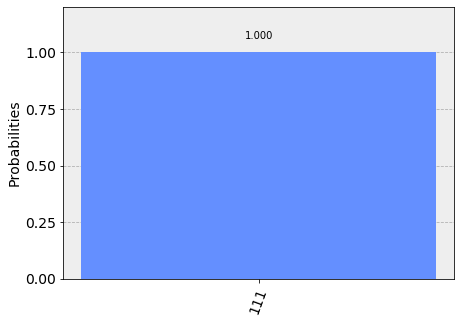

In [15]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

We can see how the state $|11>$ is being amplified just like we saw previously without using the ancilla bit. You can ignore the 1 in the highest order as that comes from the ancilla bit. 

# Learning Challenge Exercise II

Implement Grover's algorithm with 2 qubits to find the answer $|10>$.
In doing so, try two different approaches. One without using the ancilla bit and the other with an ancilla bit. *Please note that the higher order number shown in the states correspond to the higher quantum register index.* 

Based on the simulator result, please submit the quantum state (bit string) with the highest probability. In addition, use an unroller to breakdown the circuit and send each number of u3 and CX gates and submit those results as well.  <br/>

For details on how to use an unroller. Please check out [How to Calculate Quantum Costs](https://github.com/quantum-challenge/2019/blob/master/problems/how_to_calculate_quantum_cost_en.ipynb).

Use this [Submission Form](https://angelhack.typeform.com/to/AakobE) to submit your code for learning challenges 1-3.

# Example Answer
## Without an ancilla bit

In [16]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

Create an Oracle to inverse the sign of $|10>$ state. The oracle can be created by combining CZ gates and X gates. Verify that the oracle inverses only the sign of $|10>$ state.

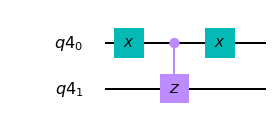

In [17]:
def phase_oracle(circuit, register):
    circuit.x(register[0])
    circuit.cz(register[0], register[1])
    circuit.x(register[0])

qr = QuantumRegister(2)
oracleCircuit = QuantumCircuit(qr)
phase_oracle(oracleCircuit, qr)
oracleCircuit.draw(output="mpl")

In [18]:
def inversion_about_average(circuit, register):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0], register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)

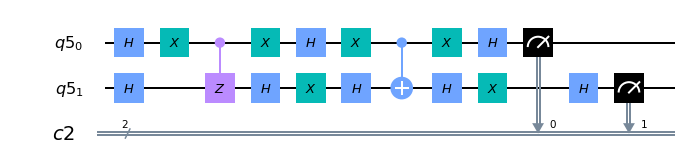

In [19]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

phase_oracle(groverCircuit, qr)
inversion_about_average(groverCircuit, qr)

groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

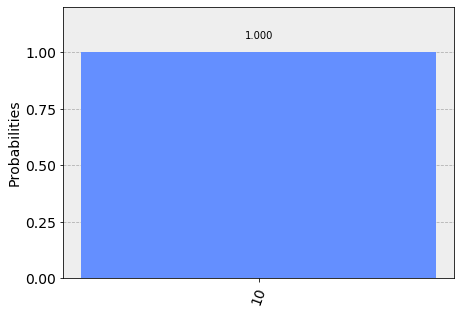

In [20]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

## With an ancilla bit

In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

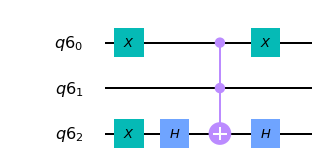

In [22]:
def phase_oracle(circuit, register,oracle_register):
    circuit.h(oracle_register)
    circuit.x(register[0])
    circuit.ccx(register[0], register[1],oracle_register)
    circuit.x(register[0])
    circuit.h(oracle_register)

qr = QuantumRegister(3)
oracleCircuit = QuantumCircuit(qr)
oracleCircuit.x(qr[2])
phase_oracle(oracleCircuit, qr,qr[2])
oracleCircuit.draw(output="mpl")

In [23]:
def inversion_about_average(circuit, register):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0], register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)

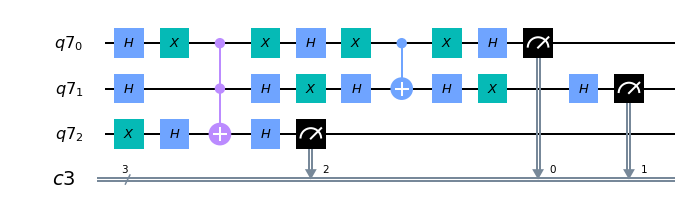

In [24]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr[0:2])
groverCircuit.x(qr[2])

phase_oracle(groverCircuit, qr,qr[2])
inversion_about_average(groverCircuit, qr[0:2])

groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

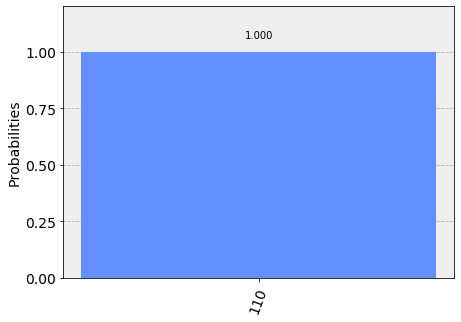

In [25]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

|10> is being amplified just like we saw previously without using the ancilla bit. (You can ignore the highest order bit as it is an ancilla bit.)